## Machine Learning and Statistics - GMIT
#### Jody Bradley (G00387878) | Due date 08/01/2021

----------------

#### Introduction
We have been tasked with creating a web service that uses machine learning to predict wind turbine power output from wind speed values, as in the data set provided ("powerproduction.csv"). This assignment is broken up into four parts:

1. A jupyter notebook that trains a model using the data set. In the notebook you should explain your model and give an analysis of its accuracy.
2. Python script that runs a web service based on the model, as above.
3. Dockerfile to build and run the web service in a container.
4. Standard items in a git respository such as a README.

#### 1. A jupyter notebook that trains a model using the data set. In the notebook you should explain your model and give an analysis of its accuracy.

#### Linear Regression in Python
Regression searches for relationships among variables. Regression is useful when you want to forecast a response using a new set of predictors [1]. In this instance, we can use regression to predict wind turbine power outputs from wind speed values.

Linear regression is among the simplest regression methods, particularly with regards to its ease of interpretation.



Simple linear regression is a linear regression model with a single explanatory variable [2].


In [7]:
# Note: We have cleansed the data set to take into account days on which the turbines were inactive.
# This has been determined to be days on which wind speeds were greater than 5mph, however, no power
# was generated. This was deeemed prudent in order to give a more accurate result.

import pandas as pd
import seaborn as sns

df = pd.read_csv('powerproduction.csv')
col=['speed','power']

# Let's see if the data has loaded correctly. If so, the headings and first 10
# rows will show - yes they do.
print(df.head(n=11))


    speed  power
0   0.000  0.000
1   0.125  0.000
2   0.150  0.000
3   0.225  0.000
4   0.275  0.000
5   0.325  4.331
6   0.400  5.186
7   0.450  3.826
8   0.501  1.048
9   0.526  5.553
10  0.551  6.498


In [8]:
# View a basic statistical overview of the dataset:
print(df.describe())

            speed       power
count  477.000000  477.000000
mean    12.408323   50.329753
std      7.104189   41.215095
min      0.000000    0.000000
25%      6.181000    6.511000
50%     12.487000   47.268000
75%     18.519000   93.964000
max     24.399000  113.556000


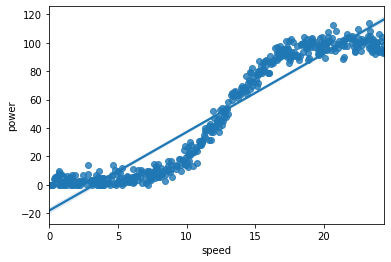

In [9]:
# Take the two variables from our data set.
production = df[["speed", "power"]].dropna()
# Scatter and fit line for just those two variables.
sns.regplot(x="speed", y="power", data=df)


In [10]:
# TRAIN

import sklearn.linear_model as lin

x = production["speed"].to_numpy()
y = production["power"].to_numpy()

x = x.reshape(-1, 1)

model = lin.LinearRegression()
model.fit(x, y)

r = model.score(x, y)
p = [model.intercept_, model.coef_[0]]


In [11]:
# The r (relationship) value is a measure of how well the line fits the data set. The r
# value ranges from 0 to 1, where 0 means no relationship and 1 means 100% related [[2.] https://www.w3schools.com/python/python_ml_linear_regression.asp].

r

0.9033294610539289

In [12]:
p

[-18.089448231194737, 5.513976519830959]

In [13]:
# Predict. If we have the wind speed (x), how much power would be generated?

def f(x, p):
    return p[0] + x * p[1]

def predict(x, p):
    return f(x, p)

In [14]:
predict(15, p)

64.62019956626965

In [15]:
# The above returns a predicted power output of 64.620 for a wind speed of 15 mph.

predict(2, p)

-7.061495191532819

#### Polynomial Regression 

Polynomial regression, like linear regression, uses the relationship between the variables x and y to find the best way to draw a line through the data points. This is best suited when your data points will not fit a linear regression [4].


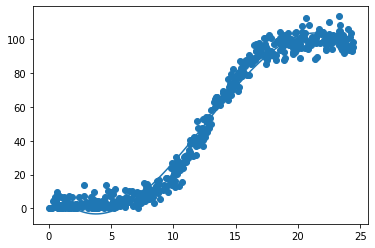

0.9785340997342342


In [16]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.metrics import r2_score

x = production["speed"].to_numpy()
y = production["power"].to_numpy()

mymodel = np.poly1d(np.polyfit(x, y, 3))
myline = np.linspace(1, 22, 100)

# Draw the line of Polynomial Regression:  
plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()

# Show the r-squared value. This ranges from 0 to 1, where 0 means no relationship and 1 means 100% related.
print(r2_score(y, mymodel(x)))


In [18]:
# The above r-squared number of 0.978534 shows that there is a very strong relationship.
# We can use polynomial regression in future predictions. 

# how can we use polynomial regression to make a prediciton?

# mymodel = np.poly1d(np.polyfit(x, y, 3))

power = mymodel(15)
    
print(power)

71.5832859107256


NOTE: Unfortunately while I tried several approaches, I was unable to succesfully host the polynomial regression model on a working API for the purpose of this assignment. 

#### 2. Creating a Python script that runs a web service based on the prediction model, as above. 

In my github repository you will find the following Python scripts [5]:

1. model.py (which develops and trains the linear regression model as outlined above);
2. app.py (which handles the POST requests and returns the results); and
3. request.py (which send requests with the features to the servers and receives the results).

#### Running the web service

1. Once you have downloaded the repository, open a new command line, navigate to the folder and run the app.py script (by typing "python app.py" into the command line". If succesful, you should see the following:
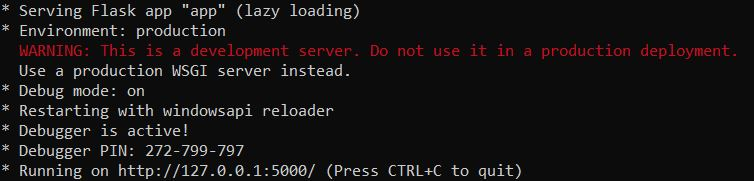
2. Open a new browser page and navigate to http://127.0.0.1:5000/ and the web server will open, where you will be prompted to enter your windspeed.
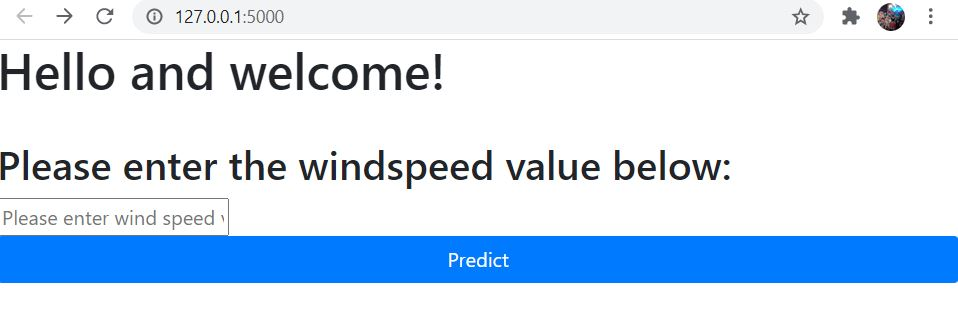
3. Once you type in your wind speed and hit "predict", the estimated wind power will be displayed below.
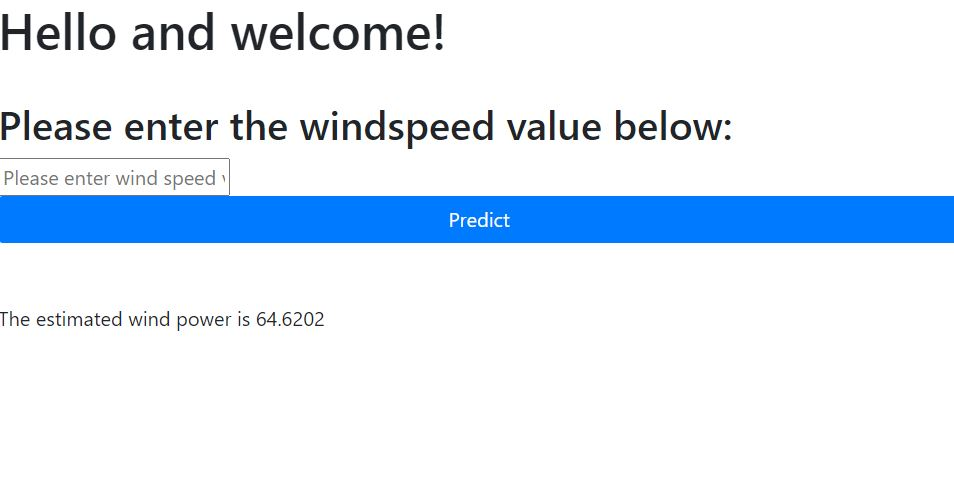

#### 3. Dockerfile to build and run the web service in a container.

From the Docker website: "A container is a standard unit of software that packages up code and all its dependencies so that the application runs quickly and reliably from one computing environment to another. A Docker container image is a lightweight, standalone, executable package of software that includes everything needed to run an application: code, runtime, system tools, system libraries and settings"[6].

To create my dockerfile, I downloaded Docker and followed Dr Ian McLoughlin's lecture tutorial [7] and the format of the files saved in the sample repository. 

After you have downloaded and unpacked the repository, to run the dockerfile:
1. Open a new command line, navigate to the folder and build the docker app by typing the following command: docker build -t model-app . You should see the following:
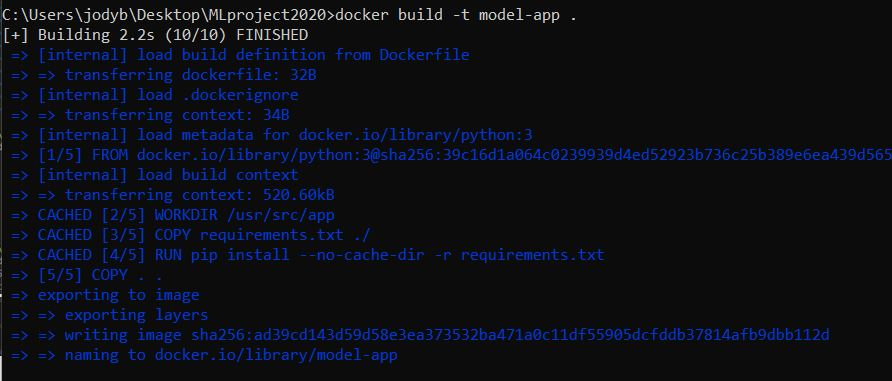
2. Type the following command: docker run -d -p 5000:5000 model-app
3. Open a new browser page and navigate to http://127.0.0.1:5000/ and the web server will open, where you will be prompted to enter your windspeed.

#### 4. Standard items in a git respository such as a README.

Please refer to the repository where you will find the following files / folders:

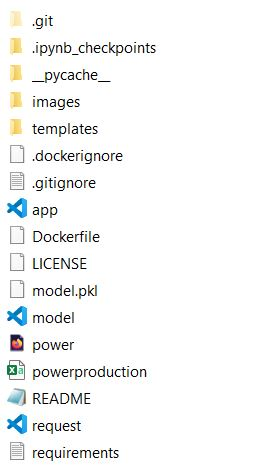


#### References
[1] https://realpython.com/linear-regression-in-python/

[2] https://en.wikipedia.org/wiki/Simple_linear_regression

[3] https://towardsdatascience.com/step-by-step-guide-building-a-prediction-model-in-python-ac441e8b9e8b

[4] https://www.w3schools.com/python/python_ml_polynomial_regression.asp

[5] https://hackernoon.com/deploy-a-machine-learning-model-using-flask-da580f84e60c

[6] https://www.docker.com/resources/what-container

[7] https://web.microsoftstream.com/video/03bfee62-fdeb-4dbe-a7d2-393d1aa40b66
